In [42]:
#Loading essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
#Loading the dataset
df = pd.read_csv('fake_news_train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


#### Exploring the dataset

In [44]:
df.shape

(20800, 5)

In [45]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [46]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [47]:
#droping the 'id' columns
df.drop('id',axis=1,inplace=True)

In [48]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

Text(0, 0.5, 'Count')

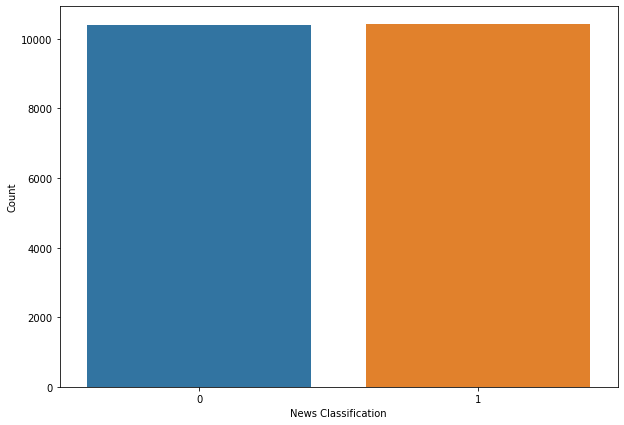

In [49]:
#Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(10,7))
sns.countplot(x='label',data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

### Data Cleaning and Preprocessing

In [50]:
print(df.shape)

(20800, 4)


In [51]:
#Finding the NAN values
df.isna().any()

title      True
author     True
text       True
label     False
dtype: bool

In [52]:
#Dropping the nan values
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


In [53]:
news = df.copy()

In [54]:
news.reset_index(inplace=True)

In [55]:
#Importing the essential libraries for performing Natural Languagae Processing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [81]:
#Cleaning the news:
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [82]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [83]:
#Creating the Bag of words Model:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [84]:
X.shape

(18285, 5000)

In [85]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [86]:
#Extracting dependent variables from the dataset
y = news['label']

#### Model Building

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

### Multinomial Naive Bayes

In [88]:
#Fitting the model to the naive bayes
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [89]:
#Predicting the test set results
nb_y_pred = nb_classifier.predict(X_test)

In [90]:
#Accuracy, Precision, Recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 90.16%
Precision score is: 0.87
Recall score is: 0.91


In [91]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test,nb_y_pred)

In [92]:
nb_cm

array([[1823,  217],
       [ 143, 1474]], dtype=int64)

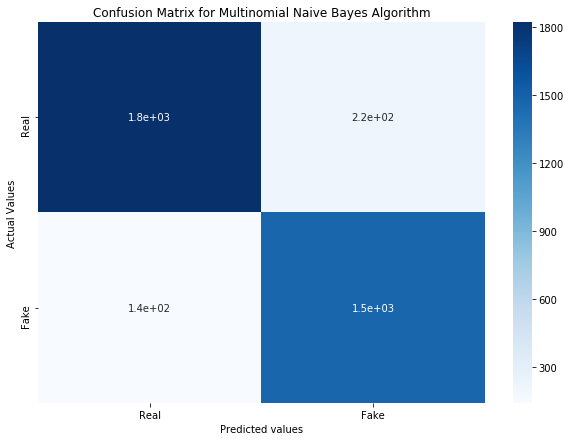

In [93]:
# Ploting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm,annot=True,cmap="Blues", xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [95]:
#Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train,y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test,temp_y_pred)
    print("Accuracy score for alpha={} is {}%".format(round(i,1),round(score*100,2)))
    if score >best_accuracy:
        best_accuracy = score
        alpha_val = i
    print("-------------------------")
    print("The best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))
    

Accuracy score for alpha=0.1 is 90.51%
-------------------------
The best accuracy is 90.51% with alpha value as 0.1
Accuracy score for alpha=0.2 is 90.51%
-------------------------
The best accuracy is 90.51% with alpha value as 0.1
Accuracy score for alpha=0.3 is 90.59%
-------------------------
The best accuracy is 90.59% with alpha value as 0.3
Accuracy score for alpha=0.4 is 90.51%
-------------------------
The best accuracy is 90.59% with alpha value as 0.3
Accuracy score for alpha=0.5 is 90.43%
-------------------------
The best accuracy is 90.59% with alpha value as 0.3
Accuracy score for alpha=0.6 is 90.37%
-------------------------
The best accuracy is 90.59% with alpha value as 0.3
Accuracy score for alpha=0.7 is 90.27%
-------------------------
The best accuracy is 90.59% with alpha value as 0.3
Accuracy score for alpha=0.8 is 90.21%
-------------------------
The best accuracy is 90.59% with alpha value as 0.3
Accuracy score for alpha=0.9 is 90.16%
-------------------------

### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
lr_classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [97]:
# Predicting the test set results
lr_y_pred = lr_classifier.predict(X_test)

In [99]:
#Accuracy, Precision, Recall
from sklearn.metrics import accuracy_score, precision_score,recall_score
score1 = accuracy_score(y_test,lr_y_pred)
score2 = precision_score(y_test,lr_y_pred)
score3 = accuracy_score(y_test,lr_y_pred)
print("----Scores-------")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))


----Scores-------
Accuracy score is: 93.52%
Precision score is: 0.89
Recall score is: 0.94


In [100]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test,lr_y_pred)

In [101]:
lr_cm


array([[1850,  190],
       [  47, 1570]], dtype=int64)

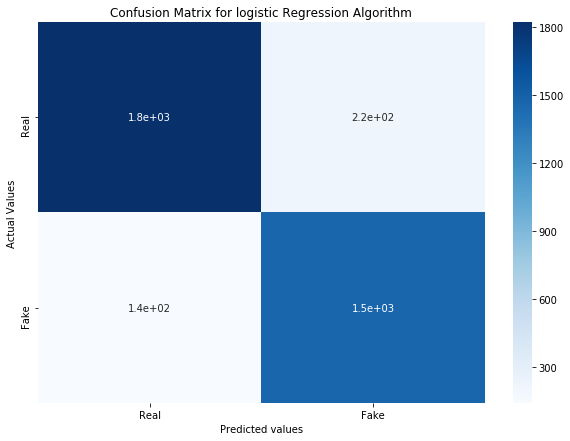

In [102]:
# plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm,annot=True,cmap="Blues",xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for logistic Regression Algorithm')
plt.show()

In [104]:
# HyperParameter tuning the logistic Regression Classifier
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = LogisticRegression(C=i,random_state=0)
    temp_classifier.fit(X_train,y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score  = accuracy_score (y_test,temp_y_pred)
    print("Accuracy score for C ={} is {}%".format(round(i,1),round(score*100,2)))
    if score > best_accuracy:
        best_accuracy = score
        c_val = i
    print("--------------------------")
    print("The best accuarcy is {}% with C value as {}".format(round(best_accuracy*100,2),round(c_val,1)))
    

Accuracy score for C =0.1 is 92.02%
--------------------------
The best accuarcy is 92.02% with C value as 0.1
Accuracy score for C =0.2 is 92.86%
--------------------------
The best accuarcy is 92.86% with C value as 0.2
Accuracy score for C =0.3 is 93.22%
--------------------------
The best accuarcy is 93.22% with C value as 0.3
Accuracy score for C =0.4 is 93.38%
--------------------------
The best accuarcy is 93.38% with C value as 0.4
Accuracy score for C =0.5 is 93.49%
--------------------------
The best accuarcy is 93.49% with C value as 0.5
Accuracy score for C =0.6 is 93.49%
--------------------------
The best accuarcy is 93.49% with C value as 0.5
Accuracy score for C =0.7 is 93.55%
--------------------------
The best accuarcy is 93.55% with C value as 0.7
Accuracy score for C =0.8 is 93.63%
--------------------------
The best accuarcy is 93.63% with C value as 0.8
Accuracy score for C =0.9 is 93.57%
--------------------------
The best accuarcy is 93.63% with C value as 0.8
A

In [105]:
classifier = LogisticRegression(C=0.8,random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=0.8, random_state=0)

### Predictions

In [120]:
def fake_news(sample_news):
    sample_news = re.sub(pattern='[^a-zA-Z]',repl='',string = sample_news)
    sample_news =sample_news.lower()
    sample_news_words = sample_news.split()
    sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_news =[ps.stem(word) for word in sample_news_words]
    final_news = ' '.join(final_news)
    
    temp = cv.transform([final_news]).toarray()
    return classifier.predict(temp)

In [121]:
# Importing the test dataset
df_test = pd.read_csv("fake_news_test.csv")
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [122]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [123]:
news_title = df_test['title']

In [124]:
news_title.shape

(5200,)

In [125]:
# For generating the random integer
from random import randint

In [126]:
# for predicting the values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]
print('News: {}'.format(sample_news))
if fake_news(sample_news):
    print('Prediction: This is a FAKE news!')
else:
    print('Prediction: This is a REAL news!')

News: Set Staff Horrified At What Hillary Is Caught Doing After Brutal Interview
Prediction: This is a FAKE news!


In [127]:
#Predicting the vales
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Nouvelles sanctions européennes contre la République arabe syrienne
Prediction: This is a FAKE news!


In [128]:
#Predicting the values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Trump Touts Marine Le Pen As ’Strongest’ Candidate in French Presidential Race
Prediction: This is a FAKE news!


In [129]:
#Predicting the values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Retesting of Doping Samples Could Bar Dozens From Rio Olympics - The New York Times
Prediction: This is a FAKE news!
